<a href="https://colab.research.google.com/github/gaurav1210/IMAGE-PROCESSING-ON-ASTRONOMY-DATA-USING-ASTROPY-/blob/main/IMAGE_PROCESSING_ON_ASTRONOMY_DATA_USING_ASTROPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installing the astropy package for astronomy related image *processing*

In [ ]:
!pip install numpy matplotlib astropy                    # command to install astropy in python

### Importing the Necessary module for image processing

In [ ]:
import numpy as np                                      # Command for importing numpy module
import matplotlib.pyplot as plt                         # Set up matplotlib
from astropy.io import fits                             # Importing fits module from the astropy package for reading fits file
from astropy.utils.data import download_file            # Importing the download_file methods from util sub-package to direct download fits file from the url link
from matplotlib.colors import LogNorm                   # Import the LogNorm Class for normalization as log form.
from scipy.ndimage import gaussian_filter               # Import the Gaussian_filter method from the ndimage module for Multi-D filtering the array.
from scipy import ndimage                               # Import the ndimage module from the scipy library.
%matplotlib inline


### Downloading the fits image file from the astropy organisation

In [ ]:
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )     # Data source link


In [ ]:
hdu = fits.open(image_file)            # Opeing the Flexible Image Transport System (FITS) image file using open method
hdu.info()                             # Checking the data info


Filename: /root/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


**Observations**

1.  The file contain 2 header data unit i.e. 1st 'PRIMARY' and 2nd 'er.mask'

2. In 'PRIMARY', its type is 'PrimaryHDU' and version is 1, it contains the 161 cards which indicates number of header lines and dimension (891 x 893) which indicates 2D array with 891 rows and 893 columns.

3. In 'er.mask', its type is 'TableHDU' and version is 1, it contains the 25 cards which indicates number of header lines and dimension (1600R x 4C) which indicates Table or 2-D with 1600 rows and 4 columns.




In [ ]:
img_arr = hdu[0].data                  # Checking the image into array value
img_arr

array([[ 7201,  6642,  6642, ...,  9498,  9498, 10057],
       [ 6642,  6363,  6642, ..., 10057, 10616, 10616],
       [ 6922,  6642,  6922, ..., 10337, 11175, 10616],
       ...,
       [ 5412,  5132,  5412, ..., 13000, 12580, 12021],
       [ 5796,  5517,  5796, ..., 12546, 12546, 11987],
       [ 5796,  5796,  6076, ..., 11987, 12546, 12546]], dtype='>i2')

**Observations**

1. It is a 2-D NumPy array with dimension (891 x 893) where ">i2" indicates i.e. '>' indicates **Big-endian byte order** and i2 indicates **16 bits** integer.

2. The value in the array seems ranges from nearly 5000 to 13000 and the pattern we observed that some repeating values in adjacent columns and value tends to increase from left to right in some rows.
3. Data might be change in values indicating a potential gradient or pattern in data.

In [ ]:
print(img_arr.shape)                     # Checking the shape of data


(893, 891)


In [ ]:
hdu.close()                             # Closing the header data unit


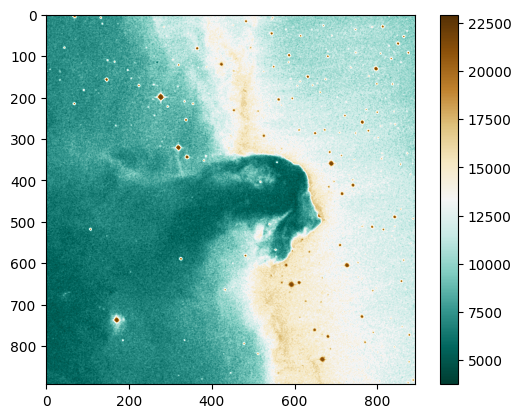

In [ ]:
plt.imshow(img_arr, cmap='BrBG_r')        # Displaying the image data
plt.colorbar()

**Observations**

1. The image showing a celestial objects that resemble **Horsehead Nebula** with 891 pixels as height and 893 pixels as widths.

2. The color bar in the right of image showing the range of pixel values from 5k to 22500 approximately where the lower value shwoing the darker region which is nearly center of images nad higher value shwoing the lighter regions of the image.
3. The central dark region is likely to be **Horsehead Nebula** a dark nebula in the constellation orion and the surrounding area may reprsent the illuminated gases and dusts.

### Check the statistical measurement

In [ ]:
print('Min:', np.min(img_arr))                   # Printing the Min pixel values of images
print('Max:', np.max(img_arr))                   # Printing the Max pixel values of images
print('Mean:', np.mean(img_arr))                 # Printing the Mean pixel values of images
print('Stdev:', np.std(img_arr))                 # Printing the Standard deviation pixel values of images
print('Variance:', np.var(img_arr))              # Printing the Variance pixel values of images
print('Median:', np.median(img_arr))             # Printing the Median pixel values of images

Min: 3759
Max: 22918
Mean: 9831.481676287574
Stdev: 3032.3927542049046
Variance: 9195405.815754408
Median: 9658.0


 **Observations on Statistical Values**

1. **Min (3759):** The minimum pixel value in the image is 5000. This represents the darkest parts of the image, likely corresponding to areas with the least amount of light emission or absorption.

2. **Max (22918):** The maximum pixel value is 22431. This indicates the brightest regions in the image, which could be due to strong light emission from stars or reflection from dust and gas.

3. **Mean (9831.48):** The average pixel value is 8471.3. This suggests that the overall brightness of the image is relatively low, with a significant portion of the image occupied by dark regions.

4. **Stdev (3032.3927..):** The standard deviation of 1816.9 indicates a moderate amount of variation in pixel values. This suggests that there is a reasonable amount of contrast and detail present in the image.

5. **Variance (9195405.815754408):** The variance of 3301206.8 quantifies the spread of pixel values around the mean. A higher variance indicates a wider range of brightness levels in the image.

6. **Median (9658.0):** The median pixel value is 8335.0. This value is close to the mean, suggesting a relatively symmetrical distribution of pixel values.


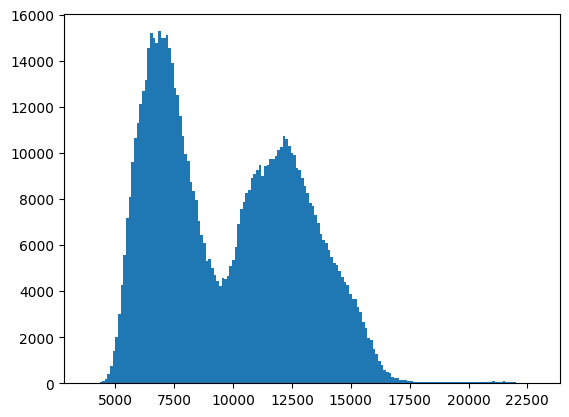

In [ ]:
histogram = plt.hist(img_arr.flatten(), bins='auto')                 # Plotting the histogram plot using plt library


**Observations on the Histogram:**

1. **Distribution:** The histogram shows a roughly bell-shaped distribution, but it's skewed to the right (positive skew). This indicates that a larger portion of the image's pixels have lower intensity values (darker regions), with a smaller number of pixels having higher intensities (brighter regions).

2. **Peak:** The peak of the histogram is located around the lower intensity values (around 5000-10000). This confirms that the majority of the image is composed of darker areas.

3. **Tail:** The right tail of the histogram extends towards higher intensity values, indicating the presence of some bright features within the image, such as stars or bright nebula regions.

4. **Range:** The histogram spans a wide range of pixel intensities, reflecting the diverse brightness levels present in the image, from the dark nebula to the brighter surrounding regions.


[Text(1, 5000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

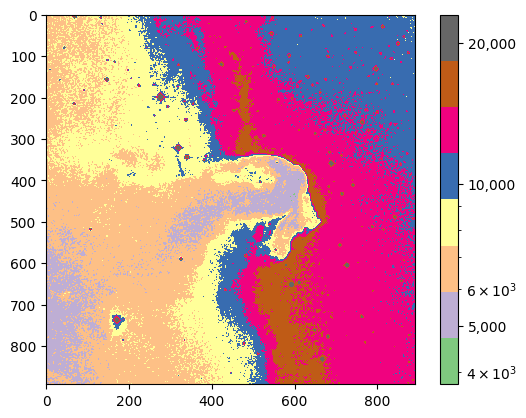

In [ ]:
plt.imshow(img_arr, cmap='Accent', norm=LogNorm())
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])                         # I chose the tick marks based on the histogram above
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])



**Observations on the Log-Normalized Image:**

1. **Enhanced Contrast:** The log normalization significantly enhances the contrast of the image, revealing details in both the dark and bright regions that were not as apparent in the linearly scaled image.

2. **Bright Star Details:** The bright stars in the image are less saturated, and we can now discern more details within them. The log scaling prevents the bright pixels from overwhelming the fainter details.

3. **Colorbar Interpretation:** The colorbar now represents a logarithmic scale, with the tick marks indicating orders of magnitude (5,000, 10,000, 20,000). This helps us understand the relative brightness differences between different regions of the image.

4. **Scientific Value:** This enhanced visualization is valuable for scientific analysis as it allows astronomers to study the intricate details of the Horsehead Nebula and its surrounding environment, potentially revealing new insights into star formation and the dynamics of interstellar gas and dust.


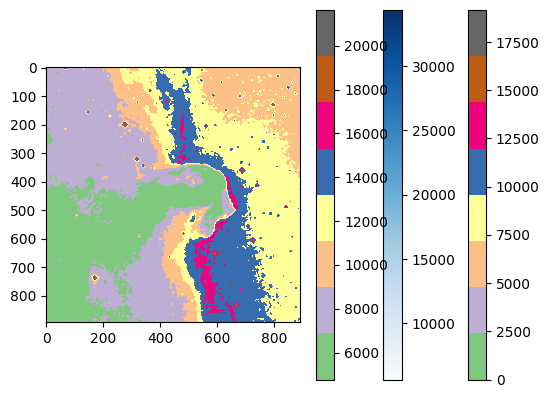

In [ ]:
inverted_image = np.max(img_arr) - img_arr                                  # Invert the image
plt.imshow(inverted_image, cmap='Accent')
plt.colorbar()
contrast_factor = 1.5                                                       # Adjust contrast Increase contrast by scaling pixel values
contrasted_image = img_arr * contrast_factor
plt.imshow(contrasted_image, cmap='Blues')
plt.colorbar()                                                              # Apply a Gaussian blur to the image
blurred_image = gaussian_filter(img_arr, sigma=2)
plt.imshow(blurred_image, cmap='Accent')
plt.colorbar()


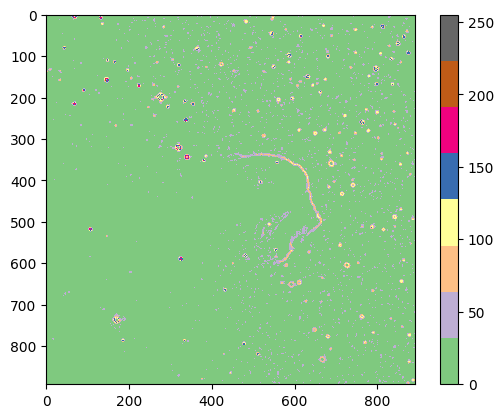

In [ ]:
dx = ndimage.sobel(img_arr, 0)                     # horizontal derivative
dy = ndimage.sobel(img_arr, 1)                     # vertical derivative
mag = np.hypot(dx, dy)                             # magnitude
mag *= 255.0 / np.max(mag)                         # normalize (Q&D)
plt.imshow(mag, cmap='Accent')
plt.colorbar()


In [ ]:
print(img_arr)                                    # 1. Print the entire array (not recommended for large images):


[[ 7201  6642  6642 ...  9498  9498 10057]
 [ 6642  6363  6642 ... 10057 10616 10616]
 [ 6922  6642  6922 ... 10337 11175 10616]
 ...
 [ 5412  5132  5412 ... 13000 12580 12021]
 [ 5796  5517  5796 ... 12546 12546 11987]
 [ 5796  5796  6076 ... 11987 12546 12546]]


Pixel value at row 100, column 200: 7191


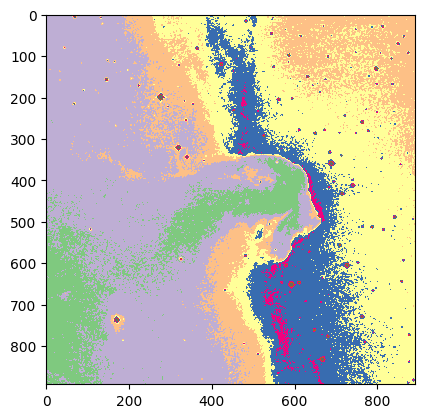

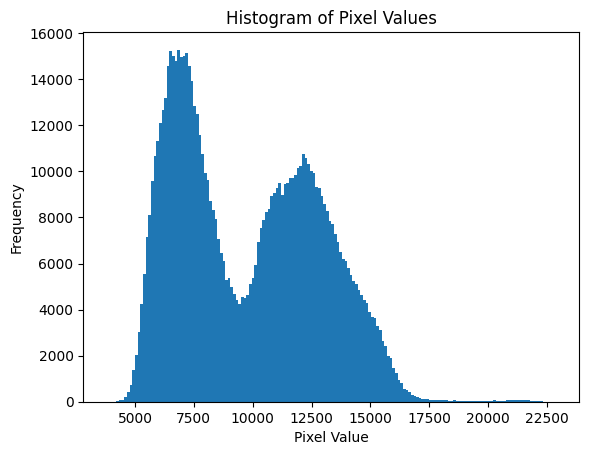

In [ ]:
row = 100                                                                      # Replace with the row index you want
col = 200                                                                      # Replace with the column index you want
pixel_value = img_arr[row, col]
print(f"Pixel value at row {row}, column {col}: {pixel_value}")
plt.imshow(img_arr, cmap='Accent')                                               # Visualize the image and use a cursor to inspect pixel values
plt.show()
plt.hist(img_arr.flatten(), bins='auto')                                       # Create a histogram to see the distribution of pixel values:
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.title("Histogram of Pixel Values")
plt.show()


**Observations on Image Transformations:**

1. **Inverted Image:**
- The inverted image reverses the brightness scale, making the darkest regions appear brightest and vice versa.
- This can be useful for highlighting faint structures that might be difficult to see in the original image.

2. **Contrasted Image:**
- Increasing the contrast factor amplifies the differences between bright and dark regions, making the image appear more visually striking.
- This can help to bring out subtle details and enhance the overall visual impact of the image.

3. **Blurred Image:**
- Applying a Gaussian blur smooths out the image, reducing noise and fine details.
- This can be useful for removing unwanted artifacts or for emphasizing larger-scale structures in the image.
